# Historischer Temperaturverlauf für deutsche Wetterstationen

Der Deutsche Wetterdienst (DWD) stellt für 78 Wetterstationen unter der Adresse https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivtagmonat.html historische Wetterdaten als "Klimaarchiv" zur Verfügung. Die Datenarchiven liegen als Zip-Archive vor und beinhalten Messwerte auf Tages- oder Monatsbasis.

Im Folgenden sollen die historischen Tagesmittelwerte für eine auswählbare Station graphisch ausgewertet werden. Dazu wird zunächst eine Liste der DWD-Stationen angezeigt, aus der eine Station auszuwählen und deren ID in einer Variable zu setzen ist.

## Code

Bibliotheken laden

In [1]:
# BeautifulSoup installieren
!pip install bs4

# Bibliotheken laden
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import urllib3
from   bs4 import BeautifulSoup
import re


  Stored in directory: /home/dsxuser/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


Grundlegende Definitionen wie URL etc.

In [2]:
# URL der Tab-sep. datei mit der Liste der DWD-Stationen
dwd_stationen_tsv = "https://raw.githubusercontent.com/docdiesel/climatechange/master/data/dwd_stationen.tsv"

# URL @DWD, unter der die Zieladresses des Wetterdaten.zip ausgegeben wird; für {} muss die Stationskennziffer eingesetzt werden
klarchivtagmonatURL = "https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivtagmonat.html?view=renderJsonFacetFormat&undefined=Absenden&cl2Categories_LeistungsId=klarchivtagmonat&lsId=526270&cl2Categories_Station=klarchivtagmonat_{}&cl2Categories_Zeitraum=klarchivtagmonat_daily&cl2Categories_ZeitlicheAufloesung=klarchivtagmonat_his&cl2Categories_Format=archiv"

# Datei zum Speichern der Stationsliste
stations_tsv_filename = './stationen.tsv'

# div Output-Definitionen
zip_file_name = 'data.zip'
csv_dir_name = '.'


Funktion zum Herunterladen von Quelldaten definieren

In [3]:
def download_file(url,file_path):
    urllib3.disable_warnings()
    print('Download von ' + url + ' in Datei ' + file_path)
    with urllib3.PoolManager() as http:
        r = http.request('GET', url)
        if r.status == 200:
            print('Dateigroesse ist ' + str(r.headers['Content-Length']) + ' Bytes')
            with open(file_path, 'wb') as fout:
                fout.write(r.data)
        else:
            print('Download fehlgeschlagen, http response code = ' + str(r.status)) 


Liste der DWD-Stationen herunterladen

In [4]:
# Liste der DWD-Stationen herunterladen
download_file(dwd_stationen_tsv, stations_tsv_filename)


Download von https://raw.githubusercontent.com/docdiesel/climatechange/master/data/dwd_stationen.tsv in Datei ./stationen.tsv
Dateigroesse ist 5334 Bytes


Komplette Liste in Pandas Dataframe laden

In [5]:
df_stations = pd.read_csv(stations_tsv_filename, sep='\t')
df_stations.head(5)

,STATIONS-KENNZIFFER,STATIONS_ID,ICAO-KENNUNG,STATIONSNAME,STATIONSHÖHE IN METERN,GEOGR. BREITE,GEOGR. LÄNGE,AUTOMAT SEIT:,BEGINN KLIMAREIHE
0,10501,3,NaN,Aachen,202,50° 47',06° 05',01.07.1993,1891
1,10505,15000,NaN,Aachen-Orsbach,231,50° 47',06° 01',01.04.2011,2011
2,10291,164,NaN,Angermünde,54,53° 01',13° 59',01.11.1991,1947
3,10091,183,NaN,Arkona,42,54° 40',13° 26',01.11.1991,1947
4,10852,232,EDMA,Augsburg,462,48° 25',10° 56',10.11.1996,1947


### Daten auf die Spalten Kennziffer, Name und Beginn der Aufzeichnung reduzieren
Aus der so generierten Liste ist eine Station auszuwählen und ihre Kennziffer weiter unten einzutragen.

In [6]:
# Daten auf die Spalten Kennziffer, Name und Beginn der Aufzeichnung reduzieren
df_select_station = df_stations[['STATIONS-KENNZIFFER','STATIONSNAME','BEGINN KLIMAREIHE']]
df_select_station.set_index('STATIONS-KENNZIFFER', inplace=True)
df_select_station

,STATIONSNAME,BEGINN KLIMAREIHE
STATIONS-KENNZIFFER,,
10501,Aachen,1891
10505,Aachen-Orsbach,2011
10291,Angermünde,1947
10091,Arkona,1947
10852,Augsburg,1947
10675,Bamberg,1949
10XXX,Berlin-Dahlem (LFAG),1876
10381,Berlin-Dahlem (FU),1950
10382,Berlin-Tegel,1963


## Station auswählen und Daten auswerten

In die Variable ''station_id'' wird die Stations-Kennziffer der auszuwertenden DWD-Station eingesetzt.

In [7]:
station_id = '10961'

In [8]:
try:
    station_name = df_select_station.loc[station_id]['STATIONSNAME']
    print('Daten werden ausgewertet für DWD-Station ' + station_name + ' (Kennziffer ' + station_id +')' )
except:
    print('Station ' + station_id + ' kann nicht gefunden werden. Vertippt?')

Daten werden ausgewertet für DWD-Station Zugspitze (Kennziffer 10961)


### Simulieren der DWD-Archiv-Webseite. 

Dort wird bei Auswahl aus einer Select-Box eine Anfrage an den Server gesendet, wobei die Antwort ein HTML-Fragment mit der Ziel-URL der Wetterdaten-Zip-datei enthält. Diese Adresse wird mithilfe von BeautifulSoup extrahiert.

In [9]:

with urllib3.PoolManager() as http:
    resp  = http.request('GET', klarchivtagmonatURL.format(station_id))
    page  = resp.data
    soup  = BeautifulSoup(page)
    links = []
    for link in soup.findAll('a', attrs={'href': re.compile("^DE/")}):
        links.append(link.get('href'))

    if len(links) != 1:
        print('Fehler: Unerwarteter HTML-Inhalt in DWD-Abfrage; Link zu Wetterdaten-Archivdatei fehlt. Ev. gibt es zu dieser Station kein Archiv.')
        print(html_page)
    else:
        print('Pfad zu Archiv: ' + links[0])
        kl_data_url = 'https://www.dwd.de/' + links[0]


Pfad zu Archiv: DE/leistungen/_config/leistungsteckbriefPublication.zip;jsessionid=78BC8C2F0C24FC79B9E5DC582BD86D74.live11054?view=nasPublication&nn=16102&imageFilePath=157242051950877752011408908330930139598321949458353665338080907323067407358570939094063695252196106887026681320814526060536595251033063153662108661981192575715848535028223489905255018373803265100435386215906807083093060068862731121403199342148533170662727882327712427127&download=true


### Wetterdaten-Archiv herunterladen

In [10]:
download_file(kl_data_url, zip_file_name)

Download von https://www.dwd.de/DE/leistungen/_config/leistungsteckbriefPublication.zip;jsessionid=78BC8C2F0C24FC79B9E5DC582BD86D74.live11054?view=nasPublication&nn=16102&imageFilePath=157242051950877752011408908330930139598321949458353665338080907323067407358570939094063695252196106887026681320814526060536595251033063153662108661981192575715848535028223489905255018373803265100435386215906807083093060068862731121403199342148533170662727882327712427127&download=true in Datei data.zip
Dateigroesse ist 1008998 Bytes


Inhaltsverzeichnis der Zip-Datei erstellen

In [11]:
import zipfile

zip = zipfile.ZipFile(zip_file_name)
zip_listoffiles = zip.namelist()
zip_listoffiles[0:5]


['Metadaten_Geographie_05792.txt',
 'Metadaten_Geraete_Luftdruck_Stationshoehe_05792.html',
 'Metadaten_Geraete_Luftdruck_Stationshoehe_05792.txt',
 'Metadaten_Geraete_Lufttemperatur_05792.html',
 'Metadaten_Geraete_Lufttemperatur_05792.txt']

TSV-Datei extrahieren (produkt_klima_tag_datumVon_datumBis_stationsKennziffer.txt)

In [12]:
text_file_name = ''
for zipped_file_name in zip_listoffiles:
    if zipped_file_name.startswith('produkt_klima_tag'):
        text_file_name = zipped_file_name
        print('Extrahiere ' + text_file_name + ' nach ' + csv_dir_name)
        zip.extract(text_file_name, csv_dir_name)

if text_file_name == '':
    print('produkt_klima_tag-Datei konnte nicht extrahiert werden.')
else:
    print('Fertig.')

Extrahiere produkt_klima_tag_19000801_20181231_05792.txt nach .
Fertig.


Check: Erste 5 Zeilen ausgeben

In [13]:
# print head of file
with open(csv_dir_name + '/' + text_file_name) as myfile:
    for entry in [next(myfile) for x in range(5)]:
        print(entry)


STATIONS_ID;MESS_DATUM;QN_3;  FX;  FM;QN_4; RSK;RSKF; SDK;SHK_TAG;  NM; VPM;  PM; TMK; UPM; TXK; TNK; TGK;eor

       5792;19000801;-999;-999;-999;    5;  -999;-999;   15.000;   5;   0.0;   3.9;  715.30;    3.6;   50.00;    6.2;   -3.6;-999;eor

       5792;19000802;-999;-999;-999;    5;  -999;-999;    6.200;-999;   5.0;   8.3;  713.70;    5.2;   88.00;   12.6;    2.2;-999;eor

       5792;19000803;-999;-999;-999;    5;  -999;-999;    1.300;-999;   8.0;   7.9;  710.60;    3.7;   96.00;    7.9;    1.2;-999;eor

       5792;19000804;-999;-999;-999;    5;  -999;-999;    0.000;-999;   8.0;   6.3;  706.30;   -0.3;   98.00;    5.2;   -2.8;-999;eor



Daten in Pandas Dataframe laden und oberste 5 Zeilen ausgeben

In [14]:
df = pd.read_csv(csv_dir_name + '/' + text_file_name, sep=';')
df.head(5)

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,5792,19000801,-999,-999.0,-999.0,5,-999.0,-999,15.0,5,0.0,3.9,715.3,3.6,50.0,6.2,-3.6,-999,eor
1,5792,19000802,-999,-999.0,-999.0,5,-999.0,-999,6.2,-999,5.0,8.3,713.7,5.2,88.0,12.6,2.2,-999,eor
2,5792,19000803,-999,-999.0,-999.0,5,-999.0,-999,1.3,-999,8.0,7.9,710.6,3.7,96.0,7.9,1.2,-999,eor
3,5792,19000804,-999,-999.0,-999.0,5,-999.0,-999,0.0,-999,8.0,6.3,706.3,-0.3,98.0,5.2,-2.8,-999,eor
4,5792,19000805,-999,-999.0,-999.0,5,-999.0,-999,0.0,10,8.0,4.4,705.9,-4.0,95.0,-0.9,-5.4,-999,eor


Wichtige Temp.-Messwerte:
* TMK : Tagesmittel der Temperatur
* TNK : Tagesminimum der Lufttemperatur in 2m Hoehe
* TXK : Tagesmaximum der Lufttemperatur in 2m Höhe
* TGK : Minimum der Lufttemperatur am Erdboden in 5cm Hoehe


### Daten anreichern

Für spätere Auswertungen und Experimente werden dem Datensatz einige Spalten hinzugefügt, wie Dekade, Jahr, Jahr&Monat und Monat&Tag.

In [15]:
# Spalten für spätere Auswertungen hinzufügen
df.insert( 1,  'md', df['MESS_DATUM']  %  10000 )
df.insert( 1,  'ym', df['MESS_DATUM'] //    100 )
df.insert( 1,   'y', df['MESS_DATUM'] //  10000 )
df.insert( 1, 'dcd', df['MESS_DATUM'] // 100000 )
df.head(5)

,STATIONS_ID,dcd,y,ym,md,MESS_DATUM,QN_3,FX,FM,QN_4,...,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,5792,190,1900,190008,801,19000801,-999,-999.0,-999.0,5,...,5,0.0,3.9,715.3,3.6,50.0,6.2,-3.6,-999,eor
1,5792,190,1900,190008,802,19000802,-999,-999.0,-999.0,5,...,-999,5.0,8.3,713.7,5.2,88.0,12.6,2.2,-999,eor
2,5792,190,1900,190008,803,19000803,-999,-999.0,-999.0,5,...,-999,8.0,7.9,710.6,3.7,96.0,7.9,1.2,-999,eor
3,5792,190,1900,190008,804,19000804,-999,-999.0,-999.0,5,...,-999,8.0,6.3,706.3,-0.3,98.0,5.2,-2.8,-999,eor
4,5792,190,1900,190008,805,19000805,-999,-999.0,-999.0,5,...,10,8.0,4.4,705.9,-4.0,95.0,-0.9,-5.4,-999,eor


Tage ohne Messwert enthalten -999 => in NaN umwandeln, damit diese nicht den Plot verderben

In [16]:
df.loc[df[' TMK'] == -999,' TMK'] = np.nan
df.loc[df[' TXK'] == -999,' TXK'] = np.nan
df.loc[df[' TNK'] == -999,' TNK'] = np.nan
df.loc[df[' TGK'] == -999,' TGK'] = np.nan

Wie vollständig ist die Meßreihe? Fehlen für einzelne Tage Meßwerte zum Tagesmittel? - Die Meßwerte werden im Folgenden nach Jahr gezählt, dies graphisch dargestellt und die lückenhaften Jahre aufgelistet.

In [17]:
df0= df.rename(columns={"y": "Jahr"}).groupby('Jahr').count()[[' TMK']]
df0.rename(columns={" TMK": "Anzahl Messpunkte"},inplace=True)
df0.head()

,Anzahl Messpunkte
Jahr,
1900,153
1901,365
1902,365
1903,365
1904,366


Line-Plot der Anzahl der Meßwerte; Ausreißer nach unten zeigen fehlende Meßwerte an

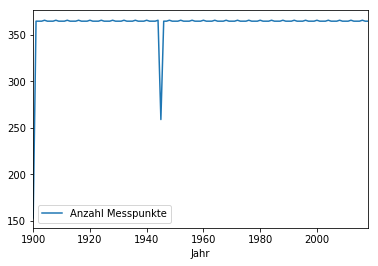

In [18]:
ax = df0.reset_index().plot.line(x='Jahr', y='Anzahl Messpunkte', rot=0)

In [19]:
# Auflisten der Jahre mit fehlenden Meßwerten: 
for index, row in df0.reset_index().iterrows():
    if row['Anzahl Messpunkte'] < 365:
        print(str(row['Jahr']) + ': ' + str(row['Anzahl Messpunkte']) )

1900: 153
1945: 259


### Erster Einblick in die Daten: Zeige Temp. über erste vier Jahre der Aufzeichnung

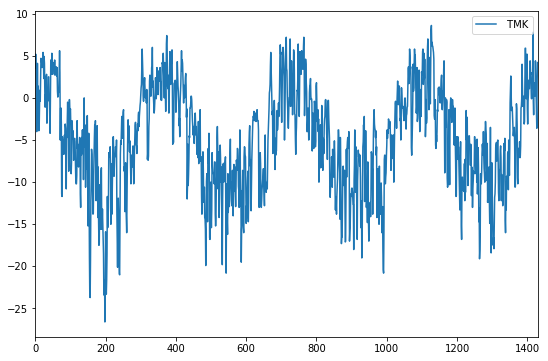

In [20]:
df.iloc[0:1430].plot(kind='line',y=' TMK',figsize=(9,6))

### ISO-Datum erzeugen und als neuen Index setzen

ISO-Datum berechnen yyyymmdd => yyyy-mm-dd und in temp. Array speichern; später zuweisen

In [21]:
temp = []
for index, row in df.iterrows():
    year  = row['y']
    month = row['md']//100
    day   = row['md']%100
    temp.append("{:4d}-{:02d}-{:02d}".format(year,month,day))
df['dt'] = temp

df.head(5)

,STATIONS_ID,dcd,y,ym,md,MESS_DATUM,QN_3,FX,FM,QN_4,...,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor,dt
0,5792,190,1900,190008,801,19000801,-999,-999.0,-999.0,5,...,0.0,3.9,715.3,3.6,50.0,6.2,-3.6,NaN,eor,1900-08-01
1,5792,190,1900,190008,802,19000802,-999,-999.0,-999.0,5,...,5.0,8.3,713.7,5.2,88.0,12.6,2.2,NaN,eor,1900-08-02
2,5792,190,1900,190008,803,19000803,-999,-999.0,-999.0,5,...,8.0,7.9,710.6,3.7,96.0,7.9,1.2,NaN,eor,1900-08-03
3,5792,190,1900,190008,804,19000804,-999,-999.0,-999.0,5,...,8.0,6.3,706.3,-0.3,98.0,5.2,-2.8,NaN,eor,1900-08-04
4,5792,190,1900,190008,805,19000805,-999,-999.0,-999.0,5,...,8.0,4.4,705.9,-4.0,95.0,-0.9,-5.4,NaN,eor,1900-08-05


#### dt als neuen Index setzen

In [22]:
df.set_index('dt', inplace=True)

### Zeige letzte zwei Jahre mit ISO-Datum

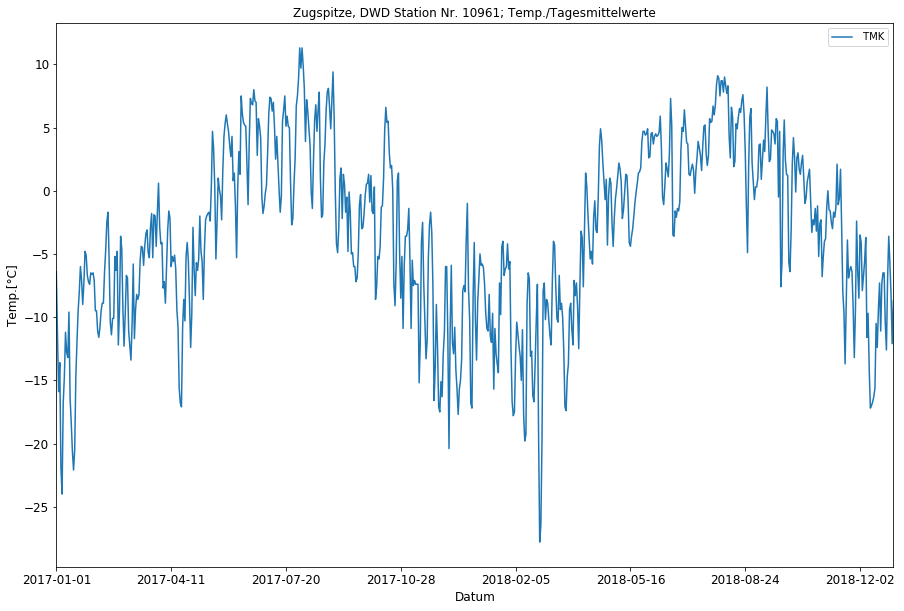

In [23]:
last_row  = df.shape[0]
start_row = last_row-730

ax = df.iloc[start_row:last_row].plot(kind='line', y=' TMK', title = station_name + ", DWD Station Nr. " + station_id + "; Temp./Tagesmittelwerte",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Datum",fontsize=12)
ax.set_ylabel("Temp.[°C]",fontsize=12)
plt.show()

### Auswertung über Gesamtzeitraum mit gleitendem Durchschnitt über 5 Jahre

Gleitenden Durchschnitt berechnen und an den DataFrame anhängen

In [24]:
df['Tagesmittel über 5a']  = df[' TMK'].rolling(window=5*365,min_periods=5*365-31).mean()
df['Tagesminimum über 5a'] = df[' TNK'].rolling(window=5*365,min_periods=5*365-31).mean()
df['Tagesmaximum über 5a'] = df[' TXK'].rolling(window=5*365,min_periods=5*365-31).mean()
df.tail(5)

,STATIONS_ID,dcd,y,ym,md,MESS_DATUM,QN_3,FX,FM,QN_4,...,PM,TMK,UPM,TXK,TNK,TGK,eor,Tagesmittel über 5a,Tagesminimum über 5a,Tagesmaximum über 5a
dt,,,,,,,,,,,,,,,,,,,,,
2018-12-27,5792,201,2018,201812,1227,20181227,3,10.2,4.3,3,...,714.15,-3.6,57.13,-0.2,-5.6,NaN,eor,-3.256110,-5.782959,-0.511616
2018-12-28,5792,201,2018,201812,1228,20181228,3,12.5,5.9,3,...,713.31,-5.7,59.79,-4.5,-9.2,NaN,eor,-3.252438,-5.780493,-0.508822
2018-12-29,5792,201,2018,201812,1229,20181229,3,20.2,6.3,3,...,713.37,-8.2,65.46,-6.4,-11.1,NaN,eor,-3.250082,-5.778466,-0.507068
2018-12-30,5792,201,2018,201812,1230,20181230,3,19.0,7.0,3,...,711.31,-12.1,87.54,-9.2,-14.2,NaN,eor,-3.252164,-5.780219,-0.508658
2018-12-31,5792,201,2018,201812,1231,20181231,3,16.3,6.1,3,...,713.85,-8.7,94.58,-5.8,-11.1,NaN,eor,-3.252986,-5.781699,-0.510027


Grafische Auswertung

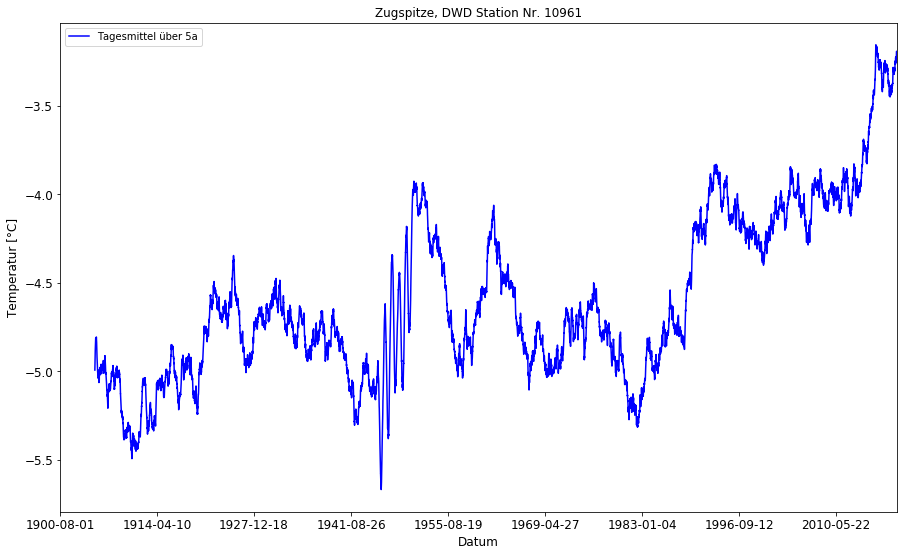

In [25]:
ax2 = df.plot(kind='line',
              y='Tagesmittel über 5a',
              title = station_name + ", DWD Station Nr. " + station_id,
              figsize=(15,9),
              legend=True,
              color='blue',
              fontsize=12)
ax2.set_xlabel("Datum",fontsize=12)
ax2.set_ylabel("Temperatur [°C]",fontsize=12)
#ax2.axhline(y=5.0,color='green')
#ax2.axhline(y=7.0,color='green')
plt.show()

### Auswertung über Gesamtzeitraum mit Mittelwert pro Dekade

Eine vereinfachte Form der Darstellung ist die Reduktion auf einen Datenpunkt pro zehn Jahre, indem für jede Dekade der Mittelwert über alle  Tagesmitteltemperaturwerte bestimmt wird.

In [26]:
df4= df.rename(columns={"dcd": "Dekade"}).groupby('Dekade').mean()[[' TMK']]
df4.tail()

,TMK
Dekade,
197,-4.831873
198,-4.699151
199,-4.168976
200,-3.970298
201,-3.501947


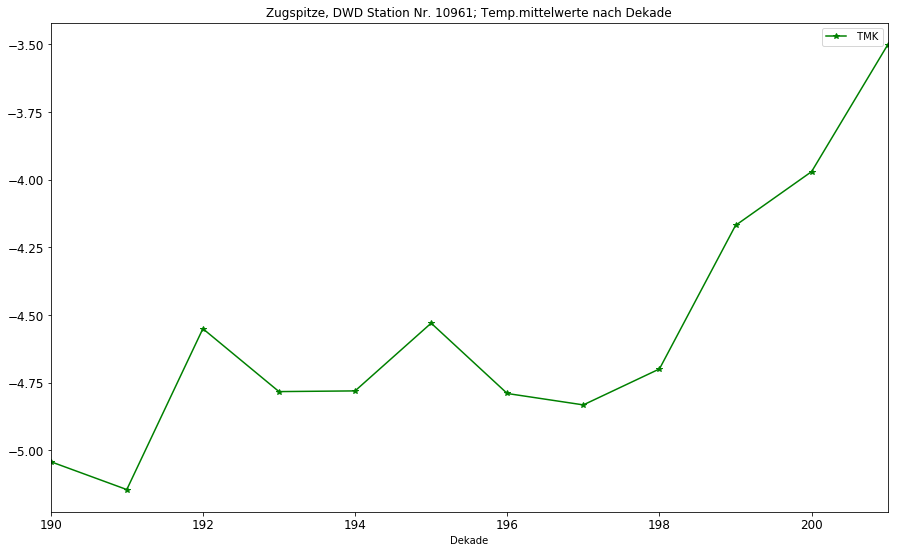

In [27]:
ax6 = df4.plot(kind='line',
              y=' TMK',
              title = station_name + ", DWD Station Nr. " + station_id + "; Temp.mittelwerte nach Dekade",
              figsize=(15,9),
              legend=True,
              color='green',
              style='*-',
              fontsize=12)
ax2.set_xlabel("Dekade",fontsize=12)
ax2.set_ylabel("Temperatur [°C]",fontsize=12)
#ax4 = df.reset_index().plot.line( y='TXK_m5a', color='red',  ax=ax2)
#ax5 = df.reset_index().plot.line( y='TNK_m5a', color='blue', ax=ax2)
plt.show()

## Auswertung nach Mittelwert pro Jahr

Es wird für jedes Jahr der Mittelwert der Tagesmitteltemperaturen gebildet.

In [28]:
df5= df.rename(columns={"y": "Jahr"}).groupby('Jahr').count()[['MESS_DATUM']]
df5.rename(columns={"MESS_DATUM": "Anzahl Messpunkte"},inplace=True)
df5['Jahresmittel']  = df.groupby('y').mean()[[' TMK']]
df5.tail()

,Anzahl Messpunkte,Jahresmittel
Jahr,,
2014,365,-3.106849
2015,365,-2.785205
2016,366,-3.619672
2017,365,-3.829315
2018,365,-2.933699


Jahre mit weniger als 360 Meßwerten werden aus dieser Teilauswertung entfernt

In [29]:
for index, row in df5.reset_index().iterrows():
    if row['Anzahl Messpunkte'] < 360:
        print('Folgendes Jahr hat zu wenige Messpunkte und wird aus dieser Teilauswertung entfernt:')
        print(str(row['Jahr']) + ': ' + str(int(row['Anzahl Messpunkte'])) + ' Messpunkte' )
        df5 = df5.drop([row['Jahr']], axis=0)

Folgendes Jahr hat zu wenige Messpunkte und wird aus dieser Teilauswertung entfernt:
1900.0: 153 Messpunkte
Folgendes Jahr hat zu wenige Messpunkte und wird aus dieser Teilauswertung entfernt:
1945.0: 259 Messpunkte


Berechnung von geglätteten Mitteln über 10 bzw 30 Jahre

In [32]:
df5['Glättung_10Jahre'] = df5['Jahresmittel'].rolling(window=10).mean()
df5['Glättung_30Jahre'] = df5['Jahresmittel'].rolling(window=30).mean()

### Grafik erzeugen

Text(0, 0.5, 'Temperatur [°C]')

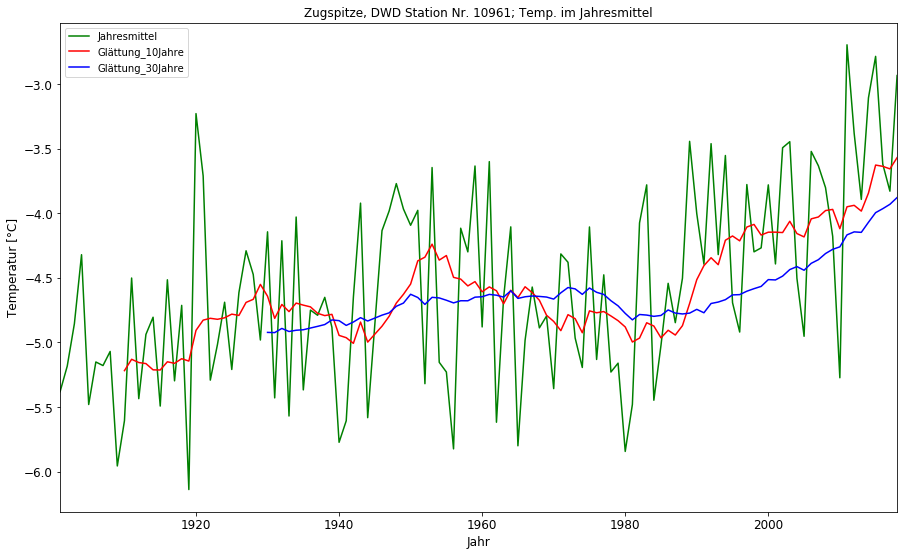

In [33]:
ax6 = df5.plot(kind='line',
              y='Jahresmittel',
              title = station_name + ", DWD Station Nr. " + station_id + "; Temp. im Jahresmittel",
              figsize=(15,9),
              legend=True,
              color='green',
              fontsize=12)
ax7 = df5.reset_index().plot.line( x='Jahr', y='Glättung_10Jahre', color='red',  ax=ax6)
ax8 = df5.reset_index().plot.line( x='Jahr', y='Glättung_30Jahre', color='blue', ax=ax6)
ax6.set_xlabel("Jahr",fontsize=12)
ax6.set_ylabel("Temperatur [°C]",fontsize=12)